<a href="https://colab.research.google.com/github/Dhanashree-31/IPL_dataset/blob/main/RghavDa1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
balls = pd.read_csv("/content/ipl_data_ball.csv")
balls.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/ipl_data_ball.csv'

In [ ]:
balls.shape

(76014, 15)

In [ ]:
balls.dtypes

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

In [ ]:
balls.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [ ]:
col_remove = ['mid', 'batsman','bowler', 'striker','date']
balls.drop(labels = col_remove, axis=1, inplace=True)

In [ ]:
balls.head()

,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,non-striker,total
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,0,222
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,0,222
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,0,222
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,0,222
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,0,222


In [ ]:
balls['bowl_team'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Mumbai Indians', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [ ]:
balls['bat_team'].replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'}, regex=True, inplace=True)
balls['bat_team'].replace({'Deccan Chargers':'Sunrisers Hyderabad'},regex=True,inplace=True)
balls['bat_team'].replace({'Delhi Daredevils': 'Delhi Capitals'}, regex=True, inplace=True)
balls['bat_team'].replace({'Pune Warriors': 'Rising Pune Supergiant'}, regex=True, inplace=True)

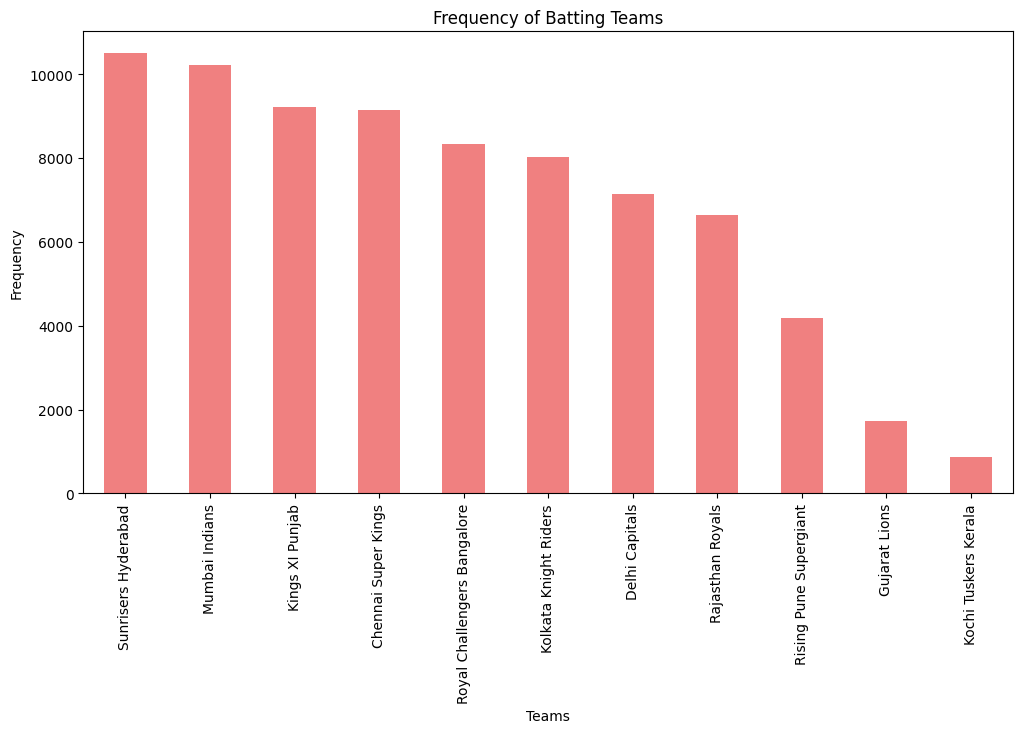

In [ ]:
plt.figure(figsize=(12, 6))
balls['bat_team'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Frequency of Batting Teams')
plt.xlabel('Teams')
plt.ylabel('Frequency')
plt.show()

In [ ]:
balls['bowl_team'].replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'}, regex=True, inplace=True)
balls['bowl_team'].replace({'Deccan Chargers':'Sunrisers Hyderabad'},regex=True,inplace=True)
balls['bowl_team'].replace({'Delhi Daredevils': 'Delhi Capitals'}, regex=True, inplace=True)
balls['bowl_team'].replace({'Pune Warriors': 'Rising Pune Supergiant'}, regex=True, inplace=True)

In [ ]:
balls['bowl_team'].value_counts()

Delhi Capitals                 10245
Royal Challengers Bangalore     9661
Mumbai Indians                  9271
Kolkata Knight Riders           9211
Kings XI Punjab                 8405
Rajasthan Royals                7773
Sunrisers Hyderabad             7573
Chennai Super Kings             6497
Rising Pune Supergiant          4672
Gujarat Lions                   1970
Kochi Tuskers Kerala             736
Name: bowl_team, dtype: int64

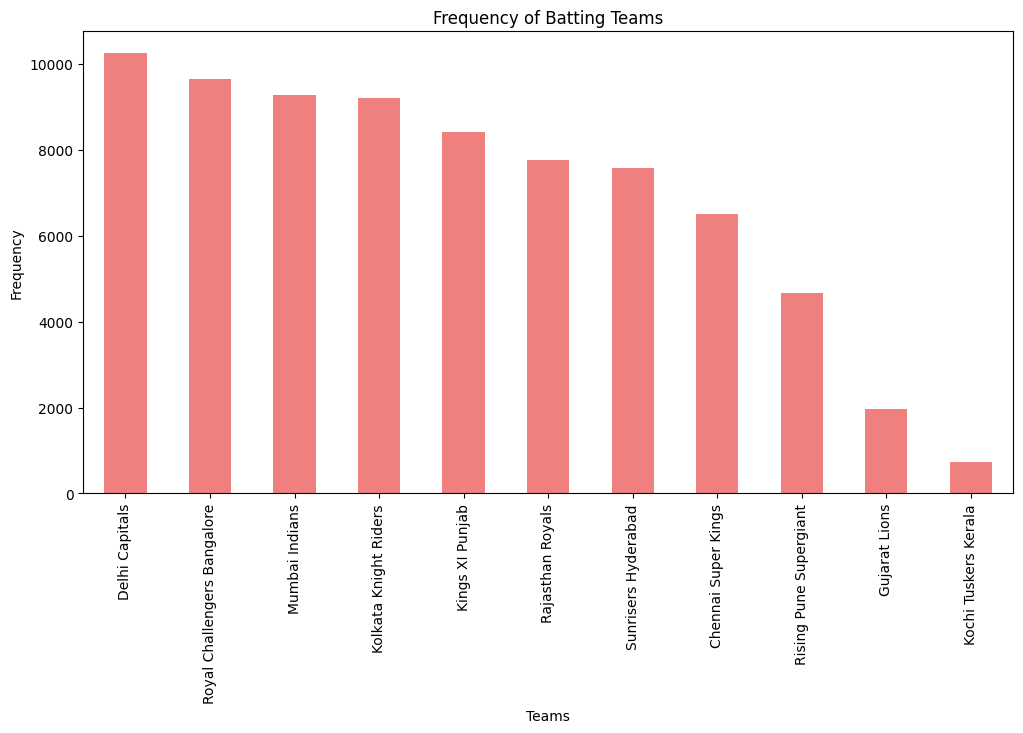

In [ ]:
plt.figure(figsize=(12, 6))
balls['bowl_team'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Frequency of Batting Teams')
plt.xlabel('Teams')
plt.ylabel('Frequency')
plt.show()

In [ ]:
balls.columns

Index(['venue', 'bat_team', 'bowl_team', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'non-striker', 'total'],
      dtype='object')

In [ ]:
print('Before removing first 5 overs data: {}'.format(balls.shape))
balls = balls[balls['overs']>=5.0]
print('After removing first 5 overs data: {}'.format(balls.shape))

Before removing first 5 overs data: (76014, 10)
After removing first 5 overs data: (56707, 10)


In [ ]:
import seaborn as sns

<ipython-input-27-24163fb5dcca>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = balls.corr()


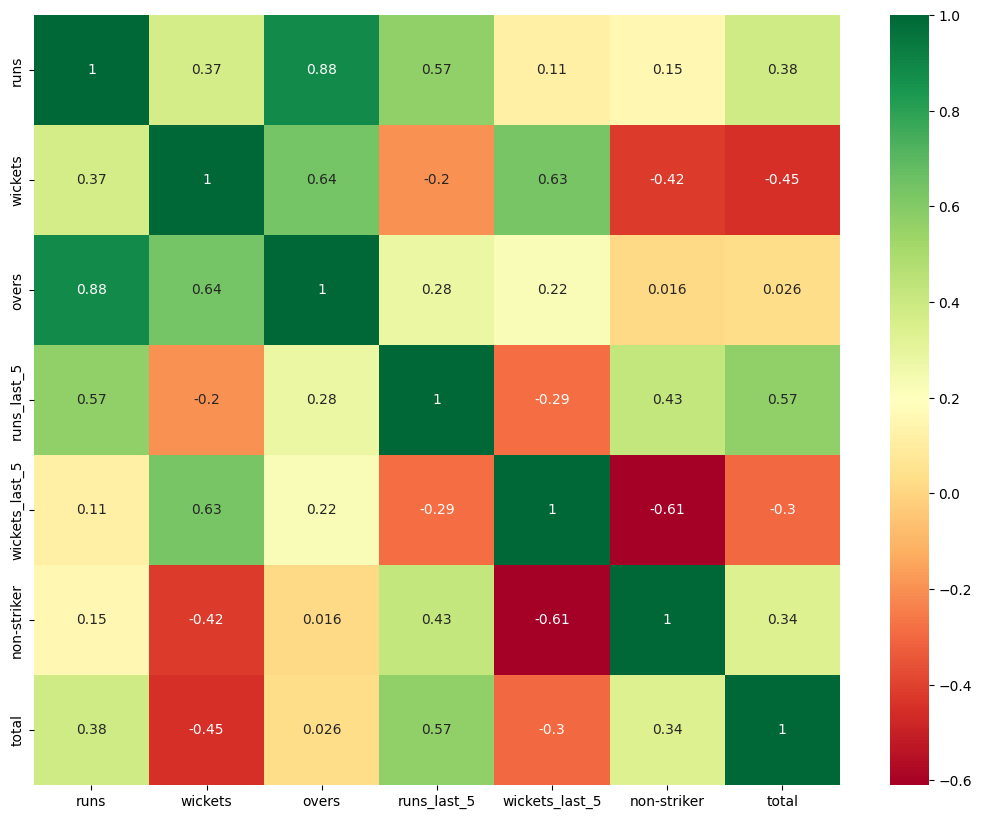

In [ ]:
corr_matrix = balls.corr()
top_corr_features = corr_matrix.index
plt.figure(figsize=(13,10))
g = sns.heatmap(data=balls[top_corr_features].corr(), annot=True, cmap='RdYlGn')

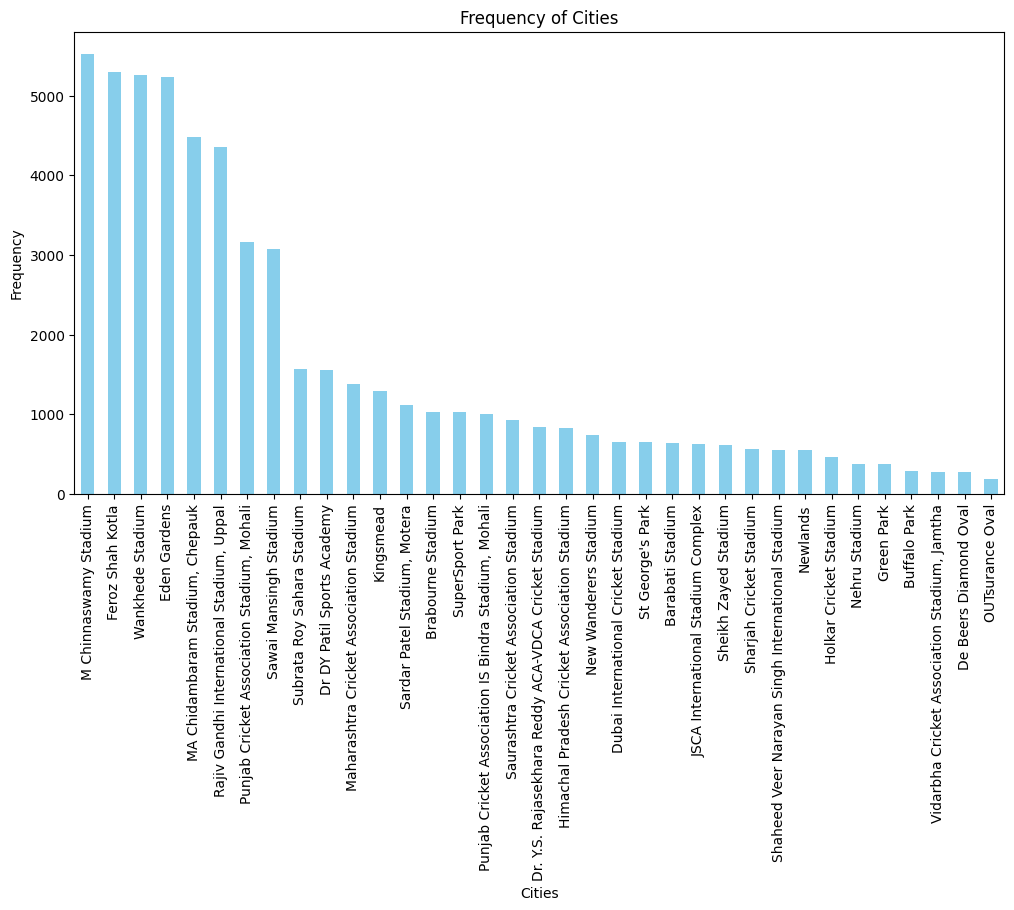

In [ ]:
plt.figure(figsize=(12, 6))
balls['venue'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Frequency of Cities')
plt.xlabel('Cities')
plt.ylabel('Frequency')
plt.show()

In [ ]:
balls.columns

Index(['venue', 'bat_team', 'bowl_team', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'non-striker', 'total'],
      dtype='object')

In [ ]:
columns_to_encode =['venue','bat_team','bowl_team']
columns_to_pass_through = ['runs', 'wickets', 'overs','runs_last_5', 'wickets_last_5', 'non-striker']

In [ ]:
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', one_hot_encoder, columns_to_encode)
    ],
    remainder='passthrough'
)

# Linear Regression

In [ ]:
lr_model = LinearRegression()

In [ ]:
from sklearn.pipeline import Pipeline
# Create the pipeline
pipe_lr = Pipeline(steps=[
    ('step1',preprocessor),
    ('step2',LinearRegression())
])

In [ ]:
  from sklearn.model_selection import train_test_split

  X = balls[columns_to_encode + columns_to_pass_through]
  y = balls['total']
  X.shape, y.shape

((56707, 9), (56707,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipe_lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['venue', 'bat_team',
                                                   'bowl_team'])])),
                ('step2', LinearRegression())])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
lr_predictions_test = pipe_lr.predict(X_test)
lr_predictions_train = pipe_lr.predict(X_train)

In [ ]:
# Evaluate metrics
def calculate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return rmse, r2, mape



In [ ]:
# Calculate metrics for each model
lr_rmse_test, lr_r2_test, lr_mape_test = calculate_metrics(y_test, lr_predictions_test)

print("Linear Regression Metrics - Test Set:")
print(f"RMSE: {lr_rmse_test}")
print(f"R-squared: {lr_r2_test}")
print(f"MAPE: {lr_mape_test}%\n")

Linear Regression Metrics - Test Set:
RMSE: 16.90386528283349
R-squared: 0.6650223048619428
MAPE: 8.51606131646146%



In [ ]:
lr_rmse_train, lr_r2_train, lr_mape_train = calculate_metrics(y_train, lr_predictions_train)

print("Linear Regression Metrics - Training Set:")
print(f"RMSE: {lr_rmse_train}")
print(f"R-squared: {lr_r2_train}")
print(f"MAPE: {lr_mape_train}%\n")

Linear Regression Metrics - Training Set:
RMSE: 16.69864821055495
R-squared: 0.6697547529016368
MAPE: 8.335621318221607%



# Random Forest Regression

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.pipeline import Pipeline
# Create the pipeline
pipe_rf = Pipeline(steps=[
    ('step1',preprocessor),
    ('step2',RandomForestRegressor())
])

In [ ]:
pipe_rf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['venue', 'bat_team',
                                                   'bowl_team'])])),
                ('step2', RandomForestRegressor())])

In [ ]:
rf_predictions_train = pipe_rf.predict(X_train)
rf_predictions_test = pipe_rf.predict(X_test)

In [ ]:
rf_rmse_train, rf_r2_train, rf_mape_train = calculate_metrics(y_train, rf_predictions_train)

print("Random Forest Regression Metrics - Training Set:")
print(f"RMSE: {rf_rmse_train}")
print(f"R-squared: {rf_r2_train}")
print(f"MAPE: {rf_mape_train}%\n")

Random Forest Regression Metrics - Training Set:
RMSE: 2.376406226348433
R-squared: 0.9933117067281835
MAPE: 0.9061893928022686%



In [ ]:
rf_rmse_test, rf_r2_test, rf_mape_test = calculate_metrics(y_test, rf_predictions_test)

print("Random Forest Regression Metrics - Test Set:")
print(f"RMSE: {rf_rmse_test}")
print(f"R-squared: {rf_r2_test}")
print(f"MAPE: {rf_mape_test}%\n")

Random Forest Regression Metrics - Test Set:
RMSE: 6.528698629105975
R-squared: 0.9500314108455896
MAPE: 2.456409768201373%



# XGBooster

In [ ]:
from sklearn.pipeline import Pipeline
# Create the pipeline
pipe_xgb = Pipeline(steps=[
    ('step1',preprocessor),
    ('step2',XGBRegressor())
])

In [ ]:
pipe_xgb.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['venue', 'bat_team',
                                                   'bowl_team'])])),
                ('step2',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_ca...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [ ]:
xgb_predictions_train = pipe_xgb.predict(X_train)
xgb_predictions_test = pipe_xgb.predict(X_test)

In [ ]:
xgb_rmse_train, xgb_r2_train, xgb_mape_train = calculate_metrics(y_train, xgb_predictions_train)

print("XGBoost Regression Metrics - Training Set:")
print(f"RMSE: {xgb_rmse_train}")
print(f"R-squared: {xgb_r2_train}")
print(f"MAPE: {xgb_mape_train}%\n")

XGBoost Regression Metrics - Training Set:
RMSE: 9.155044876736104
R-squared: 0.9007352850416765
MAPE: 4.1437315058808775%



In [ ]:
xgb_rmse_test, xgb_r2_test, xgb_mape_test = calculate_metrics(y_test, xgb_predictions_test)

print("XGBoost Regression Metrics - Test Set:")
print(f"RMSE: {xgb_rmse_test}")
print(f"R-squared: {xgb_r2_test}")
print(f"MAPE: {xgb_mape_test}%")

XGBoost Regression Metrics - Test Set:
RMSE: 10.312301845305521
R-squared: 0.8753319756237913
MAPE: 4.74571733529555%
